k = 37
n = 100
p = 0.5
pvalue(k; n, p) |> r = 0.00932
BF₁₀(k; n, p, prior = flat) |> r = 3.67
BF₁₀(k; n, p, prior = jeffreys) |> r = 2.43


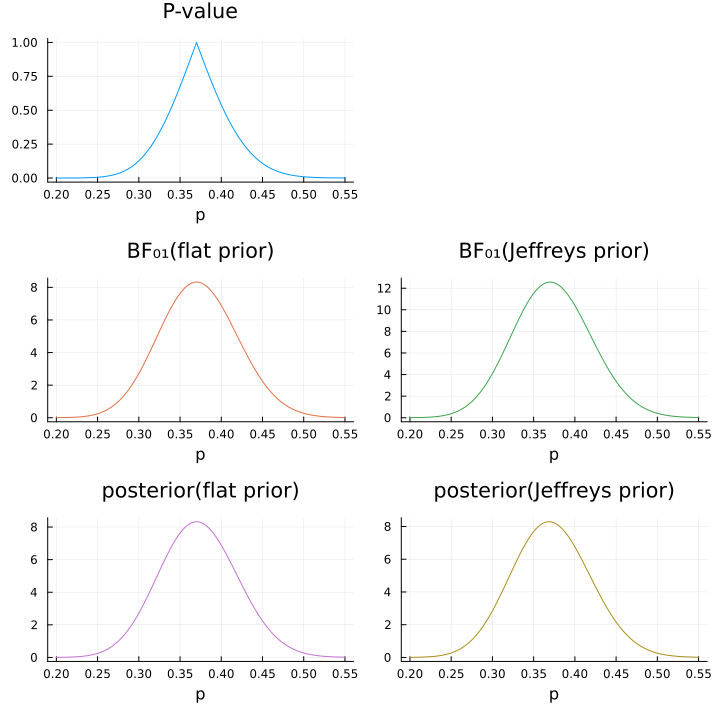

In [1]:
using Distributions
using SpecialFunctions
logbinomial(n, k) = logabsbinomial(n, k)[1]
using StatsPlots
default(fmt=:png)
r(x) = round(x; sigdigits=3)

Z₀(k; n=20, p=0.5) = pdf(Binomial(n, p), k)
flat, jeffreys = (1, 1), (1/2, 1/2)
posterior(k; n=20, p=0.5, prior=flat) = Beta(((k, n-k) .+ prior)...)
Z₁(k; n=20, prior=flat) = exp(
    logbinomial(n, k) + logbeta(((k, n-k) .+ prior)...) - logbeta(prior...))
BF₁₀(k; n=20, p=0.5, prior=flat) = Z₁(k; n, prior) / Z₀(k; n, p)
BF₀₁(k; n=20, p=0.5, prior=flat) = Z₀(k; n, p) / Z₁(k; n, prior)
pvalue(k; n=20, p=0.5) = 2ccdf(Normal(), abs((k - n*p) / √(n*p*(1-p))))

k, n, p = 37, 100, 1/2
@show k n p
@show pvalue(k; n, p) |> r
@show BF₁₀(k; n, p, prior=flat) |> r
@show BF₁₀(k; n, p, prior=jeffreys) |> r

plim, ptick = (0.2, 0.55), 0:0.05:1
P = plot(p -> pvalue(k; n, p), plim...; title="P-value", c=1)
Q = plot(p -> BF₀₁(k; n, p, prior=flat), plim...; title="BF₀₁(flat prior)", c=2)
R = plot(p -> BF₀₁(k; n, p, prior=jeffreys), plim...; title="BF₀₁(Jeffreys prior)", c=3)
S = plot(posterior(k; n, prior=flat), plim...; title="posterior(flat prior)", c=4)
T = plot(posterior(k; n, prior=jeffreys), plim...; title="posterior(Jeffreys prior)", c=5)
plot(P, Q, R, S, T; size=(720, 720), layout=@layout[a _; b c; d e])
plot!(legend=false, xguide="p", xtick=ptick)